# Image Identification from ImageNet

## What is ImageNet?

Within computer vision and deep learning communities, you might run into a bit of contextual confusion surrounding what [ImageNet](http://image-net.org/index) is and what it isn’t.

You see, [ImageNet](http://image-net.org/index) is actually a project aimed at labeling and categorizing images into almost 22,000 categories based on a defined set of words and phrases. At the time of this writing, there are over 14 million images in the ImageNet project.

## So, how is ImageNet organized?

To order such a massive amount of data, ImageNet actually follows the [WordNet](https://wordnet.princeton.edu/) hierarchy. Each meaningful word/phrase inside WordNet is called a “synonym set” or “synset” for short. Within the ImageNet project, images are organized according to these synsets, with the goal being to have 1,000+ images per synset.

List of all the classes identifiable from ImageNet: https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

There are a bunch of pre-requisites required for installing using the Keras that we have already covered. But incase if the code fails to run, you should run the below code to install all the requirements. 

In [1]:
import torch
torch.__version__

'1.4.0'

Keras and Python code for ImageNet CNNs
We are now ready to write some Python code to classify image contents utilizing Convolutional Neural Networks (CNNs) pre-trained on the ImageNet dataset.

In [34]:
# import the necessary packages
import torch
from torch import nn
import torchvision 
from torchvision import models, transforms

import numpy as np
import argparse
from PIL import Image
import json
import pickle
import urllib.request as urllib2

This step isn’t strictly required since Keras provides helper functions to load images (which I’ll demonstrate in the next code block), but there are differences in how both these functions work, so if you intend on applying any type of OpenCV functions to your images, I suggest loading your image via `Image.open`  and then again via the Keras helpers. Once you get a bit more experience manipulating NumPy arrays and swapping channels, you can avoid the extra I/O overhead, but for the time being, let’s keep things simple.

We are reading the image and resizing it to 224x224

In [3]:
# Setting the hyper-params
image_size = 224
image_size=(image_size, image_size)
image_path = './test_images/img1.jpg'

In [36]:
mappings = pickle.load(urllib2.urlopen('https://gist.githubusercontent.com/yrevar/6135f1bd8dcf2e0cc683/raw/d133d61a09d7e5a3b36b8c111a8dd5c4b5d560ee/imagenet1000_clsid_to_human.pkl') )

In [6]:
transform = transforms.Compose([            
     transforms.Resize(image_size),             
     transforms.ToTensor(),                     
     transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])

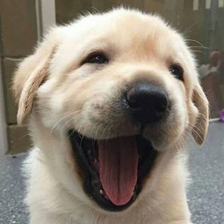

In [13]:
image=Image.open(image_path).resize(image_size)
image

In [14]:
img_t = transform(image)
image = torch.unsqueeze(img_t, 0)
image.shape

torch.Size([1, 3, 224, 224])

## Understanding ResNets

ResNet can have a very deep network of up to 152 layers by learning the residual representation functions instead of learning the signal representation directly.

ResNet introduces skip connection (or shortcut connection) to fit the input from the previous layer to the next layer without any modification of the input. Skip connection enables to have deeper network and finally ResNet becomes the Winner of ILSVRC 2015 in image classification, detection, and localization, as well as Winner of MS COCO 2015 detection, and segmentation.

### 1. Problems of Plain Network
For conventional deep learning networks, they usually have conv layers then fully connected (FC) layers for classification task like AlexNet, ZFNet and VGGNet, without any skip / shortcut connection, we call them plain networks here. When the plain network is deeper (layers are increased), the problem of vanishing/exploding gradients occurs.

### Vanishing / Exploding Gradients
During backpropagation, when partial derivative of the error function with respect to the current weight in each iteration of training, this has the effect of multiplying n of these small / large numbers to compute gradients of the “front” layers in an n-layer network
When the network is deep, and multiplying n of these small numbers will become zero (vanished).
When the network is deep, and multiplying n of these large numbers will become too large (exploded).
We expect deeper network will have more accurate prediction. However, below shows an example, 20-layer plain network got lower training error and test error than 56-layer plain network, a degradation problem occurs due to vanishing gradients.

### 2. Skip / Shortcut Connection in Residual Network (ResNet)
To solve the problem of vanishing/exploding gradients, a skip / shortcut connection is added to add the input x to the output after few weight layers as below:

![resblock](https://miro.medium.com/max/894/1*rbhjv7ZdAgXM2MlBUL5Mmw.png)
A Building Block of Residual Network

Hence, the output H(x)= F(x) + x. The weight layers actually is to learn a kind of residual mapping: F(x)=H(x)-x.
Even if there is vanishing gradient for the weight layers, we always still have the identity x to transfer back to earlier layers.

### 3. Residual Architecture

![ResNet](https://miro.medium.com/max/2000/1*6hF97Upuqg_LdsqWY6n_wg.png)

### 4. Ablation Study
### Plain Network VS ResNet
![PlainVSResNet](https://miro.medium.com/max/2000/1*k9o3BFNQCkLsC1Wadpod0w.png)

When plain network is used, 18-layer is better than 34-layer, due to the vanishing gradient problem.
When ResNet is used, 34-layer is better than 18-layer, vanishing gradient problem has been solved by skip connections.
If we compare 18-layer plain network and 18-layer ResNet, there is no much difference. This is because vanishing gradient problem does not appear for shallow network.


### ResNet architecture on ImageNet comparision
![ResNetLayers](https://miro.medium.com/max/1032/1*J4bprdWbW2F-E0z0dGptJw.png)

In [42]:
# First, load the model
resnet = models.resnet50(pretrained=True)

# Second, put the network in eval mode
resnet.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [49]:
# Carry out model inference
out = resnet(image)

# Forth, print the top 5 classes predicted by the model
_, indices = torch.sort(out, descending=True)
percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
[(mappings[idx.item()], percentage[idx].item()) for idx in indices[0][:5]]

[('Labrador retriever', 94.82183837890625),
 ('golden retriever', 4.43339204788208),
 ('kuvasz', 0.48499488830566406),
 ('beagle', 0.04557424038648605),
 ('Chesapeake Bay retriever', 0.04059232771396637)]

In [51]:
mappings[indices[0][0].item()]

'Labrador retriever'